Sentiment Analysis

In [45]:

Token = 'TOKEN2.csv'
OHCO = ['author', 'title', 'chap_num', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

mansfield = ('austen','Mansfield Park')
abbey = ('austen','Northanger Abbey')
pride_and_prejudice = ('austen', 'Pride and Prejudice')


salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

sns.set()
%matplotlib inline

## Get lexicon columns

In [3]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [4]:
salex['polarity'] = salex.positive - salex.negative

In [5]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

# Get novels

In [8]:
TOKENS = pd.read_csv('TOKEN2.csv')

In [9]:
LIB = pd.read_csv('LIB.csv').set_index('book_id')

In [10]:
TOKENS = TOKENS.join(LIB, on='book_id').drop(columns = 'book_file').set_index(OHCO).sort_index()

In [11]:
TOKENS.head(10)

book_id  token_num  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             141          0   
                                        0             141          1   
                                        0             141          2   
                                        0             141          3   
                                        0             141          4   
                                        0             141          5   
                                        0             141          6   
                                        0             141          7   
                                        0             141          8   
                                        0             141          9   

                                                               pos_tuple  pos  \
author title          chap_num para_num sent_num                                
austen Mansfield Park 49       1        0                ('About', 'IN')   IN   
                                        0               ('thirty', 'CD')   CD   
                                        0               ('years', 'NNS')  NNS   
                                        0                  ('ago', 'RB')   RB   
                                        0                ('Miss', 'NNP')  NNP   
                                        0               ('Maria', 'NNP')  NNP   
                                        0               ('Ward,', 'NNP')  NNP   
                                        0                   ('of', 'IN')   IN   
                                        0         ('Huntingdon,', 'NNP')  NNP   
                                        0                 ('with', 'IN')   IN   

                                                    token_str    term_str  \
author title          chap_num para_num sent_num                            
austen Mansfield Park 49       1        0               About       about   
                                        0              thirty      thirty   
                                        0               years       years   
                                        0                 ago         ago   
                                        0                Miss        miss   
                                        0               Maria       maria   
                                        0               Ward,        ward   
                                        0                  of          of   
                                        0         Huntingdon,  huntingdon   
                                        0                with        with   

                                                  term_id  \
author title          chap_num para_num sent_num            
austen Mansfield Park 49       1        0              44   
                                        0           10554   
                                        0           11832   
                                        0             312   
                                        0            6704   
                                        0            6474   
                                        0           11459   
                                        0            7176   
                                        0            5205   
                                        0           11713   

                                                                      book_title  \
author title          chap_num para_num sent_num                                   
austen Mansfield Park 49       1        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         

In [12]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [13]:
TOKENS[salex.columns].sample(10)

anger  anticipation  \
author title               chap_num para_num sent_num                        
austen Mansfield Park      66       3        4           0.0           0.0   
                           57       3        1           0.0           0.0   
       Pride and Prejudice 11       9        0           0.0           0.0   
       Mansfield Park      58       54       3           0.0           0.0   
                           71       48       5           0.0           0.0   
       Pride and Prejudice 8        59       1           0.0           0.0   
                           5        10       0           0.0           0.0   
       Mansfield Park      80       44       2           0.0           0.0   
       Pride and Prejudice 36       3        8           0.0           0.0   
       Mansfield Park      55       25       1           0.0           0.0   

                                                       disgust  fear  joy  \
author title               chap_num para_num sent_num                       
austen Mansfield Park      66       3        4             0.0   0.0  0.0   
                           57       3        1             0.0   0.0  0.0   
       Pride and Prejudice 11       9        0             0.0   0.0  0.0   
       Mansfield Park      58       54       3             0.0   0.0  0.0   
                           71       48       5             0.0   0.0  0.0   
       Pride and Prejudice 8        59       1             0.0   0.0  0.0   
                           5        10       0             0.0   0.0  0.0   
       Mansfield Park      80       44       2             0.0   0.0  0.0   
       Pride and Prejudice 36       3        8             0.0   0.0  0.0   
       Mansfield Park      55       25       1             0.0   0.0  0.0   

                                                       negative  positive  \
author title               chap_num para_num sent_num                       
austen Mansfield Park      66       3        4              NaN       NaN   
                           57       3        1              NaN       NaN   
       Pride and Prejudice 11       9        0              NaN       NaN   
       Mansfield Park      58       54       3              NaN       NaN   
                           71       48       5              NaN       NaN   
       Pride and Prejudice 8        59       1              NaN       NaN   
                           5        10       0              NaN       NaN   
       Mansfield Park      80       44       2              NaN       NaN   
       Pride and Prejudice 36       3        8              NaN       NaN   
       Mansfield Park      55       25       1              NaN       NaN   

                                                       sadness  surprise  \
author title               chap_num para_num sent_num                      
austen Mansfield Park      66       3        4             0.0       0.0   
                           57       3        1             0.0       0.0   
       Pride and Prejudice 11       9        0             0.0       0.0   
       Mansfield Park      58       54       3             0.0       0.0   
                           71       48       5             0.0       0.0   
       Pride and Prejudice 8        59       1             0.0       0.0   
                           5        10       0             0.0       0.0   
       Mansfield Park      80       44       2             0.0       0.0   
       Pride and Prejudice 36       3        8             0.0       0.0   
       Mansfield Park      55       25       1             0.0       0.0   

                                                       trust  polarity  
author title               chap_num para_num sent_num                   
austen Mansfield Park      66       3        4           0.0       0.0  
                           57       3        1           0.0       0.0  
       Pride and Prejudice 11       9        0           0.0   

In [14]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  \
author title               chap_num para_num sent_num                     
austen Mansfield Park      66       20       1               the    0.0   
                           79       37       0               the    0.0   
                           78       15       4           capable    0.0   
       Pride and Prejudice 43       54       12           should    0.0   
       Northanger Abbey    57       5        5               not    0.0   
       Mansfield Park      78       27       1         advantage    0.0   
                           85       3        1                to    0.0   
                           70       4        1               any    0.0   
       Northanger Abbey    37       6        3             would    0.0   
       Pride and Prejudice 40       4        1             blame    1.0   

                                                       anticipation  disgust  \
author title               chap_num para_num sent_num                          
austen Mansfield Park      66       20       1                  0.0      0.0   
                           79       37       0                  0.0      0.0   
                           78       15       4                  0.0      0.0   
       Pride and Prejudice 43       54       12                 0.0      0.0   
       Northanger Abbey    57       5        5                  0.0      0.0   
       Mansfield Park      78       27       1                  0.0      0.0   
                           85       3        1                  0.0      0.0   
                           70       4        1                  0.0      0.0   
       Northanger Abbey    37       6        3                  0.0      0.0   
       Pride and Prejudice 40       4        1                  0.0      1.0   

                                                       fear  joy  sadness  \
author title               chap_num para_num sent_num                       
austen Mansfield Park      66       20       1          0.0  0.0      0.0   
                           79       37       0          0.0  0.0      0.0   
                           78       15       4          0.0  0.0      0.0   
       Pride and Prejudice 43       54       12         0.0  0.0      0.0   
       Northanger Abbey    57       5        5          0.0  0.0      0.0   
       Mansfield Park      78       27       1          0.0  0.0      0.0   
                           85       3        1          0.0  0.0      0.0   
                           70       4        1          0.0  0.0      0.0   
       Northanger Abbey    37       6        3          0.0  0.0      0.0   
       Pride and Prejudice 40       4        1          0.0  0.0      0.0   

                                                       surprise  trust  \
author title               chap_num para_num sent_num                    
austen Mansfield Park      66       20       1              0.0    0.0   
                           79       37       0              0.0    0.0   
                           78       15       4              0.0    0.0   
       Pride and Prejudice 43       54       12             0.0    0.0   
       Northanger Abbey    57       5        5              0.0    0.0   
       Mansfield Park      78       27       1              0.0    0.0   
                           85       3        1              0.0    0.0   
                           70       4        1              0.0    0.0   
       Northanger Abbey    37       6        3              0.0    0.0   
       Pride and Prejudice 40       4        1              0.0    0.0   

                                                       polarity  
author title               chap_num para_num sent_num            
austen Mansfield Park      66       20       1              0.0  
                           79       37       0              0.0  
                           78       15       4              0.0  
       Pride and Prejudice 43       54       12   

In [15]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [16]:
TOKENS.head()

book_id  token_num  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             141          0   
                                        0             141          1   
                                        0             141          2   
                                        0             141          3   
                                        0             141          4   

                                                         pos_tuple  pos  \
author title          chap_num para_num sent_num                          
austen Mansfield Park 49       1        0          ('About', 'IN')   IN   
                                        0         ('thirty', 'CD')   CD   
                                        0         ('years', 'NNS')  NNS   
                                        0            ('ago', 'RB')   RB   
                                        0          ('Miss', 'NNP')  NNP   

                                                 token_str term_str  term_id  \
author title          chap_num para_num sent_num                               
austen Mansfield Park 49       1        0            About    about       44   
                                        0           thirty   thirty    10554   
                                        0            years    years    11832   
                                        0              ago      ago      312   
                                        0             Miss     miss     6704   

                                                                      book_title  \
author title          chap_num para_num sent_num                                   
austen Mansfield Park 49       1        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   

                                                  year  anger  anticipation  \
author title          chap_num para_num sent_num                              
austen Mansfield Park 49       1        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   

                                                  disgust  fear  joy  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   

                                                  negative  positive  sadness  \
author title          chap_num para_num sent_num                                
austen Mansfield Park 49       1        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   

                                                  surprise  trust  polarity  
author title          chap_num para_num sent_num                             
austen Mansfield Park 49       1        0              0.0    0.0       0.0  
        

In [46]:
MANSFIELD = TOKENS.loc[mansfield].copy()
ABBEY = TOKENS.loc[abbey].copy()
PRIDE = TOKENS.loc[pride_and_prejudice].copy()

<AxesSubplot:>

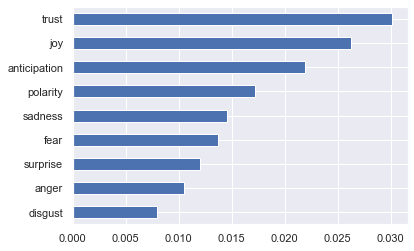

In [47]:
MANSFIELD[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

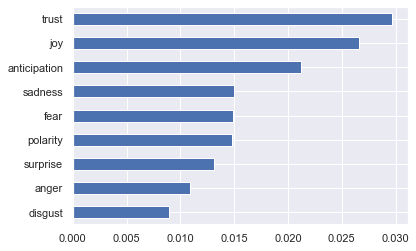

In [24]:
ABBEY[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

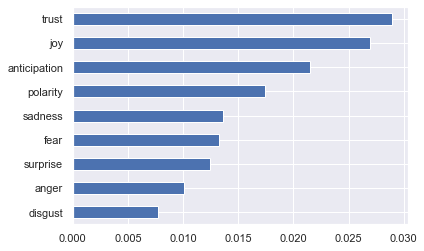

In [48]:
PRIDE[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Chapter

In [49]:
MANSFIELD_chaps = MANSFIELD.groupby(CHAPS)[emo_cols].mean()
ABBEY_chaps = ABBEY.groupby(CHAPS)[emo_cols].mean()
PRIDE_chaps = PRIDE.groupby(CHAPS)[emo_cols].mean()


In [26]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

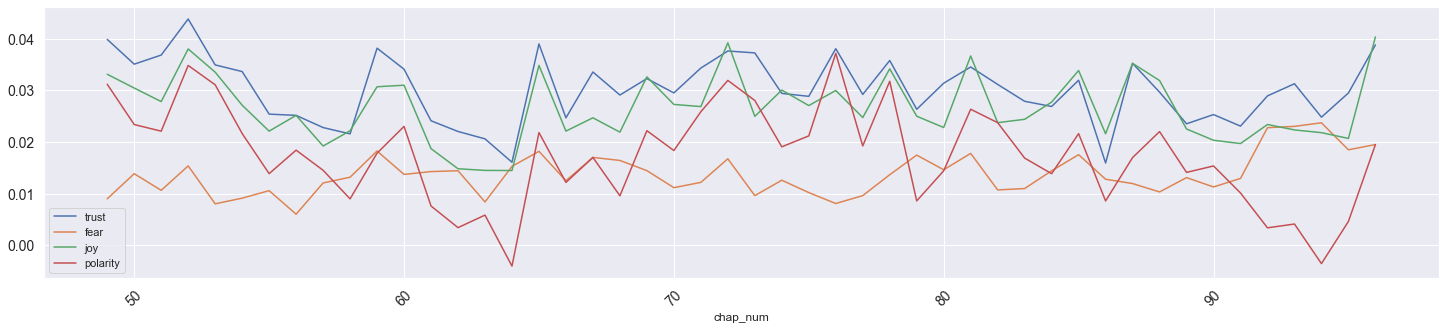

In [27]:
plot_sentiments(MANSFIELD_chaps, ['trust','fear','joy','polarity'])

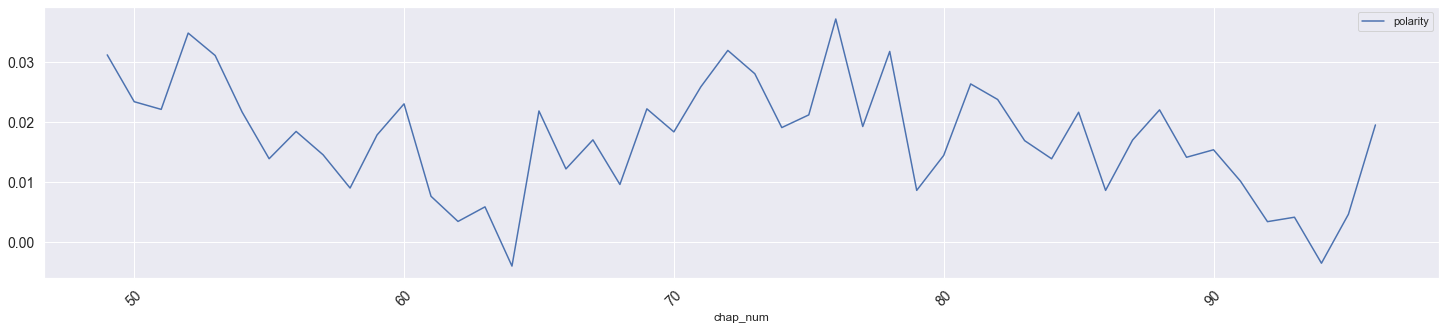

In [29]:
plot_sentiments(MANSFIELD_chaps, ['polarity'])

In [30]:
plot_sentiments(ABBEY_chaps, ['trust','joy','anticipation','polarity'])

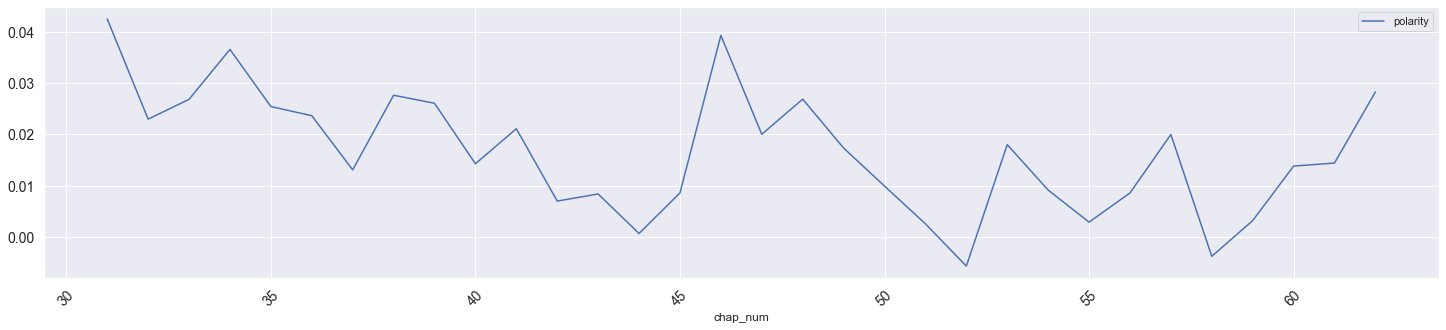

In [31]:
plot_sentiments(ABBEY_chaps, ['polarity'])

In [50]:
plot_sentiments(PRIDE_chaps, ['trust','fear','joy','polarity'])

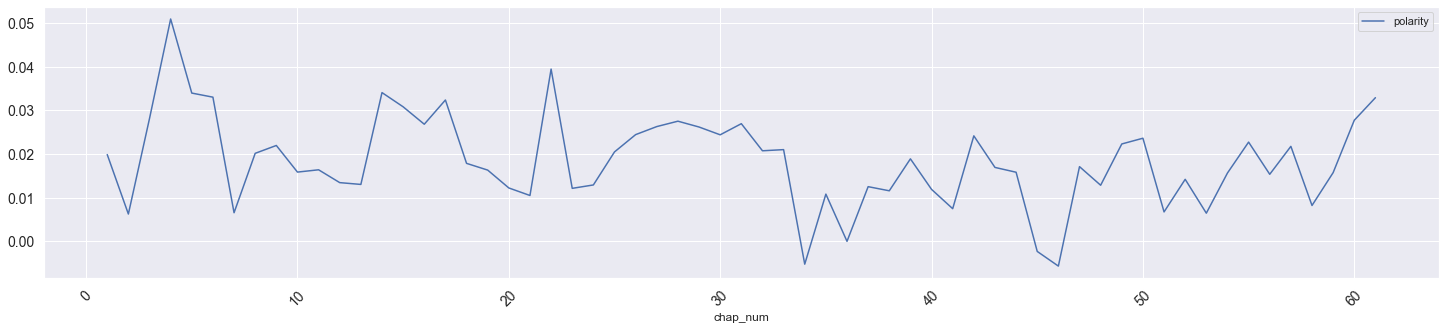

In [51]:
plot_sentiments(PRIDE_chaps, ['polarity'])

# Explore Sentiment in Texts

In [52]:
MANSFIELD['html'] =  MANSFIELD.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
ABBEY['html'] =  ABBEY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
PRIDE['html'] =  PRIDE.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [33]:
MANSFIELD['html'].sample(10)

chap_num  para_num  sent_num
71        47        0           <span class='sent0'>increase</span>
87        4         9                <span class='sent0'>was</span>
66        1         3             <span class='sent0'>guided</span>
          21        4            <span class='sent1'>lesson.</span>
73        4         0                  <span class='sent0'>a</span>
55        13        2                <span class='sent0'>the</span>
83        21        1           <span class='sent0'>Crawford</span>
76        11        0                 <span class='sent0'>to</span>
74        13        0             <span class='sent0'>Edmund</span>
63        37        0           <span class='sent0'>herself.</span>
Name: html, dtype: object

In [53]:
MANSFIELD_sents = MANSFIELD.groupby(SENTS)[emo_cols].mean()
ABBEY_sents = ABBEY.groupby(SENTS)[emo_cols].mean()
PRIDE_sents = PRIDE.groupby(SENTS)[emo_cols].mean()

In [35]:
MANSFIELD_sents['sent_str'] = MANSFIELD.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
MANSFIELD_sents['html_str'] = MANSFIELD.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [36]:
ABBEY_sents['sent_str'] = ABBEY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
ABBEY_sents['html_str'] = ABBEY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [54]:
PRIDE_sents['sent_str'] = PRIDE.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
PRIDE_sents['html_str'] = PRIDE.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [37]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [38]:
sample_sentences(MANSFIELD_sents)

In [39]:
sample_sentences(ABBEY_sents)

In [55]:
sample_sentences(PRIDE_sents)

# VADER

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [41]:
MANSFIELD_vader_cols = MANSFIELD_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
MANSFIELD_vader = pd.concat([MANSFIELD_sents, MANSFIELD_vader_cols], axis=1)

In [42]:
w = int(MANSFIELD_vader.shape[0] / 5)
MANSFIELD_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
MANSFIELD_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
MANSFIELD_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

In [43]:
ABBEY_vader_cols = ABBEY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
ABBEY_vader = pd.concat([ABBEY_sents, ABBEY_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

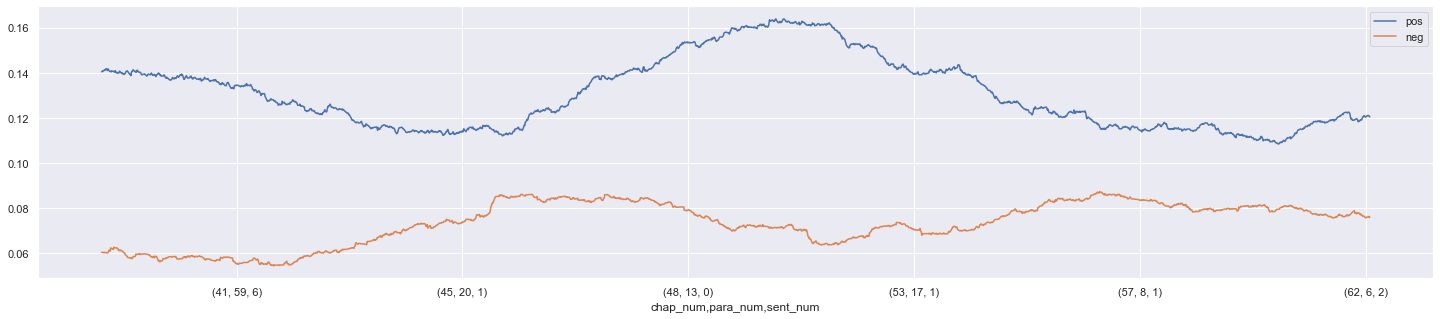

In [44]:
w = int(ABBEY_vader.shape[0] / 5)
ABBEY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
ABBEY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
ABBEY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [56]:
PRIDE_vader_cols = PRIDE_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
PRIDE_vader = pd.concat([PRIDE_sents, PRIDE_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

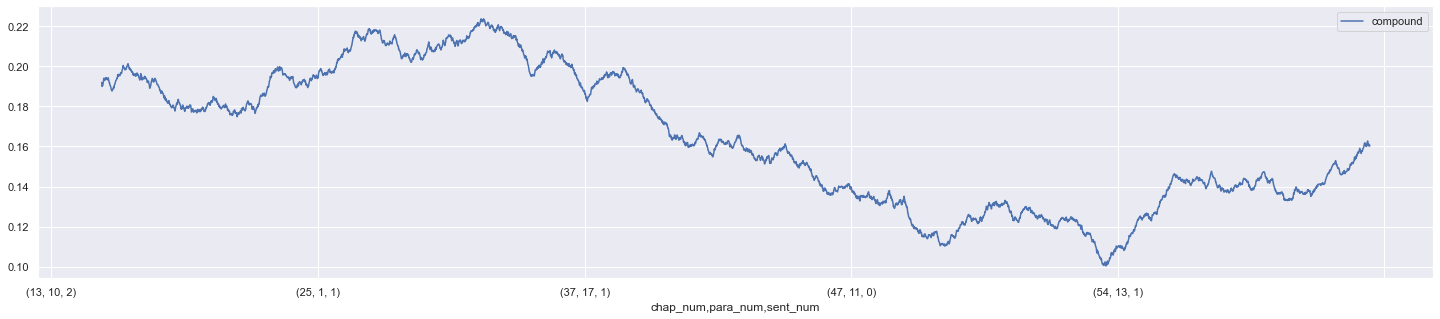

In [57]:
w = int(PRIDE_vader.shape[0] / 5)
PRIDE_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
PRIDE_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
PRIDE_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))